In [ ]:
##SUMMARY OF ALL DETAILS IN THIS DATASET

### 1)Data cleaning including missing values, outliers, and multi-collinearity:

Analyzed the dataset using info() and shape, and performed descriptive analysis with describe() 
to understand the data's characteristics.

##### Addressed missing values: Checked for missing values and determined that no treatment was required.

Checked for duplicates: no duplicates found.

##### Handled outliers: Identified extreme outliers but decided to keep them as they were valid and important 
for the model to learn.

##### Detected multi-collinearity: Found highly correlated columns (oldbalanceOrg and newbalanceOrig, 
oldbalanceDest and newbalanceDest) and created new columns (bal_diff_org and bal_diff_Dest)which is the difference b/w those two column set to address this issue.

### 2)Feature Engineering:

##### created three new columns:
Converted the step column into corresponding hour, day, month, and year columns.
Removed the year and month columns as they had limited variation (2023 and 5, respectively).

Created one more column to show the anomality.

Created two new columns which is the difference of balance after transaction for both sender and receiver and deleted four columns oldbalanceOrg,newbalanceOrig,oldbalanceDest and newbalanceDest.

##### Fraud Trends Analysis:
Examined the trends of fraud by analyzing the day, hour, and isFraud columns.
Plotted line charts and heatmaps to visualize the trends.

##### Feature Distribution:
Examined the skewness in the feature distribution and observed heavy skewness in most columns.

##### Class Imbalance:
Observed a highly imbalanced dataset.

#### Anomaly Detection:
Used the Isolation Forest algorithm to detect anomalies.
Created a new column, is_anomaly, to indicate the presence of anomalies.

##### Encoding:
Performed encoding on the type column.

##### Train-Test Split:
Split the dataset into training and testing sets.

##### Feature Scaling:
Applied the Robust Scaler to scale the features, considering the presence of outliers.

##### Feature Importance:
Assessed feature importance using the Extra Trees Classifier.

### 3)Fraud detection model:

Trained the logistic regression model but achieved a moderate ROC_AUC score of 0.712 and recall of 0.42.
Emphasized the importance of RECALL over precision.
Handling Class Imbalance:
Employed both SMOTE and RandomUnderSampler techniques to address the class imbalance.
Decision Tree and Hyperparameter Tuning:
Utilized the Decision Tree algorithm and fine-tuned it using RandomizedSearchCV and cross validated it.

### 4)Variable selection:

Selected relevant variables based on domain knowledge and exploratory data analysis.
Identified key variables related to time (day, hour), transaction balances (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest), transaction types (encoded 'type' column), and derived variables (bal_diff_org, bal_diff_Dest) that captured changes in balances.

### 5)Performance demonstration:

Assessed the performance of the model using evaluation metrics such as ROC-AUC, recall, confusion matrix, classification report, and cross-validated results.

Achieved an ROC-AUC score of 71% and recall of 0.42 and improved the recall to 0.93 and roc_auc score to 94% through resampling techniques (SMOTE and RandomUnderSampler) to address the class imbalance issue.

### 6)Fine Tuning and Performance Evaluation:
eventhough fine tuning is not required the model is again fine tuned with randomized searchCV and evaluated with cross validations.

### 7)Key factors predicting fraudulent customers:

Identified the importance of features such as transaction balances, transaction types, and temporal patterns (day, hour) in predicting fraudulent customers.
These factors align with known fraud patterns, as fraudulent transactions often involve abnormal balances, specific transaction types, and certain time patterns.

### 8)Interpretation of factors:

The identified factors make sense as they align with common characteristics associated with fraudulent behavior.
Abnormal transaction balances, specific transaction types, and unusual temporal patterns can be indicative of fraudulent activities.

### 9)Prevention strategies:

Suggested prevention strategies that the company should adopt to mitigate fraud risks, such as enhanced authentication protocols, real-time monitoring systems, and anomaly detection algorithms.
Emphasized the importance of continuously updating and improving the infrastructure to stay ahead of evolving fraud patterns.

### 10)Evaluation of prevention actions:

Proposed evaluating the effectiveness of prevention actions through ongoing monitoring, continuous improvement, and regular assessment of fraud detection and prevention measures.
Recommended using evaluation metrics, monitoring systems, and benchmarks to measure the impact of prevention measures, ensuring they are effectively detecting and preventing fraudulent activities.




In [47]:
### importing all libraries

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

from sklearn.preprocessing import RobustScaler

import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score,f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Model training libraries

from imblearn.under_sampling import RandomUnderSampler# Undersampling
from imblearn.over_sampling import RandomOverSampler  # Oversampling
from imblearn.over_sampling import SMOTE              # Both Undersampling & Oversampling

from sklearn.ensemble import IsolationForest


In [2]:
df=pd.read_csv("/Users/fasilck/Downloads/Fraud.csv")
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
42044,9,CASH_OUT,100283.31,C1522789755,16829.00,0.00,C801156385,277461.92,377745.22,0,0
5439651,378,CASH_IN,168691.30,C1606864554,2683345.78,2852037.09,C367450752,334098.47,165407.17,0,0
2866076,227,CASH_IN,274759.17,C659233388,106409.00,381168.17,C2133018314,315535.86,40776.69,0,0
5789542,401,CASH_OUT,1581.91,C1461960043,0.00,0.00,C1698087907,104760.04,106341.95,0,0
1820950,163,PAYMENT,4656.15,C650739204,2515.00,0.00,M1096192948,0.00,0.00,0,0
5270433,372,PAYMENT,16149.09,C1981007647,207896.00,191746.91,M756577078,0.00,0.00,0,0
5413353,378,CASH_IN,256686.54,C1873257181,1429742.87,1686429.41,C348342334,680534.51,423847.97,0,0
4953276,351,PAYMENT,32649.07,C964288381,10739.79,0.00,M2089883772,0.00,0.00,0,0
2625206,208,CASH_OUT,290113.20,C965143219,304987.00,14873.80,C519003016,31050.42,321163.62,0,0
1467716,140,PAYMENT,4527.90,C1693781940,20980.00,16452.10,M171242939,0.00,0.00,0,0


In [40]:
!pip install imbalanced-learn

In [65]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Analysing all columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [86]:
##we can observe only three columns are objects.so we need to encode three columns only if necessary.

In [87]:
df.shape

(6362620, 11)

In [88]:
df.describe().style.background_gradient(cmap="GnBu")##descriptive analysis

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000
mean,243.397246,179861.903549,833883.104074,855113.668579,1100701.666520,1224996.398202,0.001291,0.000003
std,142.331971,603858.231463,2888242.673007,2924048.502971,3399180.112969,3674128.942094,0.035905,0.001586
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,13389.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,74871.940000,14208.000000,0.000000,132705.665000,214661.440000,0.000000,0.000000
75%,335.000000,208721.477500,107315.175000,144258.410000,943036.707500,1111909.250000,0.000000,0.000000
max,743.000000,92445516.640000,59585040.370000,49585040.370000,356015889.350000,356179278.920000,1.000000,1.000000


we can observe 
1) amount column - The maximum value is significantly higher than the 75th percentile value, indicating a potential presence of large transaction amounts that could be outliers.
2) oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest - Similar to the 'amount' column, these balance-related columns also have maximum values that are notably higher than the 75th percentile, suggesting the possibility of outliers in the form of large balance amounts.
3) 50% of data is zero in newbalance orig column.It implies there is fraudelent activity happening because after sending money the balace becomes zero.
4) 25% data in oldbalanceOrg is zero.

# FEATURE ENGINEERING

### conveting step column

In [79]:
df.step.max()

743

In [80]:
df.step.min()

1

In [3]:
df['step'] = np.tile(range(1, 745), len(df) // 744 + 1)[:len(df)]

# Define the start date of the simulation
start_date = pd.Timestamp("2023-05-01")  # Adjust the date according to your dataset

# Map the 'step' values to timestamps
df['timestamp'] = start_date + pd.to_timedelta((df['step'] - 1) * 1, unit='H')

# Optionally, extract additional components from the timestamp (e.g., day, hour)
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
#df['week'] = df['timestamp'].dt.week
df['hour'] = df['timestamp'].dt.hour


In [11]:
df.sample(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,timestamp,year,month,day,hour
4370701,446,PAYMENT,38472.46,C1797315080,1254.00,0.0,M183557385,0.00,0.00,0,0,2023-05-19 13:00:00,2023,5,19,13
5204607,328,PAYMENT,25583.70,C1818729023,801.00,0.0,M1417414825,0.00,0.00,0,0,2023-05-14 15:00:00,2023,5,14,15
3911836,629,CASH_IN,168892.98,C1020548102,5374828.63,5543721.6,C977570654,13315326.19,13146433.21,0,0,2023-05-27 04:00:00,2023,5,27,4
5340439,8,PAYMENT,32796.89,C123935797,0.00,0.0,M1003361704,0.00,0.00,0,0,2023-05-01 07:00:00,2023,5,1,7
3663774,319,TRANSFER,728925.07,C1420990120,1893.00,0.0,C1448092074,262135.75,991060.82,0,0,2023-05-14 06:00:00,2023,5,14,6
3823095,424,CASH_OUT,115054.72,C1048476506,0.00,0.0,C1905861459,431414.27,546468.99,0,0,2023-05-18 15:00:00,2023,5,18,15
5342245,326,PAYMENT,1663.01,C2142232922,110759.81,109096.8,M752597756,0.00,0.00,0,0,2023-05-14 13:00:00,2023,5,14,13


### finding trends of fraudelent transactions

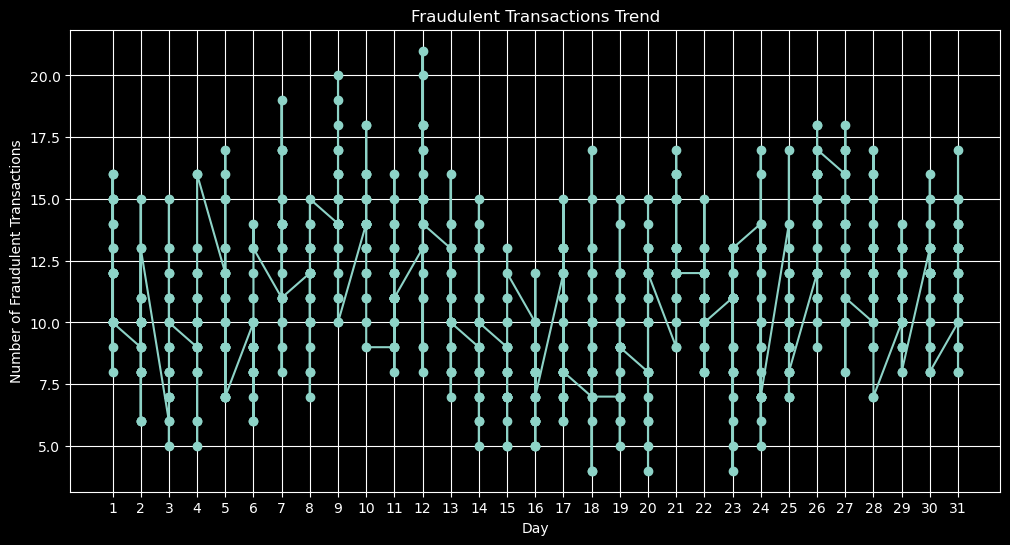

In [90]:
import matplotlib.pyplot as plt

# Subset the relevant columns for analysis
fraud_df = df[['day', 'hour', 'isFraud']]

# Group the data by day and hour, and calculate the count of fraudulent transactions
fraud_count = fraud_df.groupby(['day', 'hour']).sum().reset_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(fraud_count['day'], fraud_count['isFraud'], marker='o')
plt.title('Fraudulent Transactions Trend')
plt.xlabel('Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(1, max(fraud_count['day']) + 1))
plt.grid(True)
plt.show()


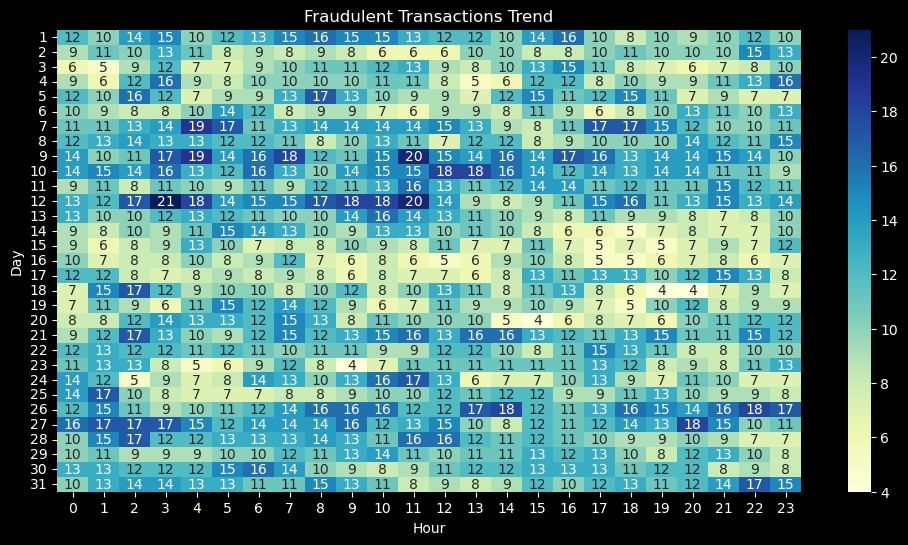

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the relevant columns for analysis
fraud_df = df[['day', 'hour', 'isFraud']]

# Group the data by day, hour, and calculate the count of fraudulent transactions
fraud_count = fraud_df.groupby(['day', 'hour']).sum().reset_index()

# Pivot the data to create a pivot table
fraud_pivot = fraud_count.pivot('day', 'hour', 'isFraud')

# Plot the pivot table as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(fraud_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Fraudulent Transactions Trend')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()


NO NOTABLE TREND IS SHOWN.WE CAN SAY FROM DAY 13 TO 17 LKESS NO.OF.FRAUDELENT TRANSACTIONS HAPPENED.
HIGHER NO.OF.FRAUDELENT TRANSACTIONS PER DAY IS 20.
MINIMUM NO.OF.FRAUDELENT TRANSACTIONS PER DAY IS 4.

### type column

In [80]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

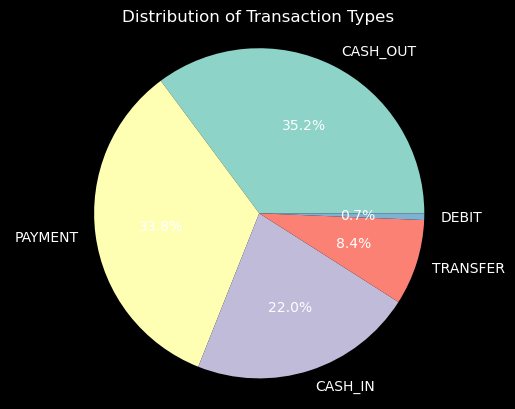

In [90]:
type_counts = df['type'].value_counts()

# Get the unique transaction types
types = type_counts.index

# Create the pie chart
plt.pie(type_counts, labels=types, autopct='%1.1f%%')

# Set the aspect ratio to make the pie chart circular
plt.axis('equal')

# Add a title
plt.title('Distribution of Transaction Types')

# Display the pie chart
plt.show()


In [29]:
df[df["type"]=="CASH_OUT"]##checking random to find anomlies

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,timestamp,day,hour
3,4,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,2023-05-01 03:00:00,1,3
15,16,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,2023-05-01 15:00:00,1,15
42,43,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0,2023-05-02 18:00:00,2,18
47,48,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0,2023-05-02 23:00:00,2,23
48,49,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0,2023-05-03 00:00:00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,668,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,2023-05-28 19:00:00,28,19
6362613,670,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,2023-05-28 21:00:00,28,21
6362615,672,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,2023-05-28 23:00:00,28,23
6362617,674,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,2023-05-29 01:00:00,29,1


In [26]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### checking missing values

In [19]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
timestamp         0
day               0
hour              0
dtype: int64

In [ ]:
we can observe there is no missing values in this datasets.

### checking for duplicates 

In [23]:
df.duplicated().sum()

0

### checking for outliers 

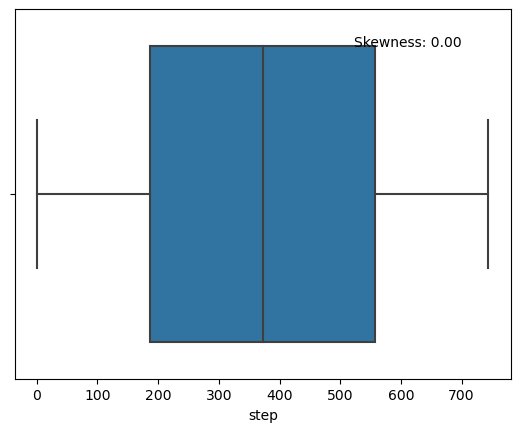

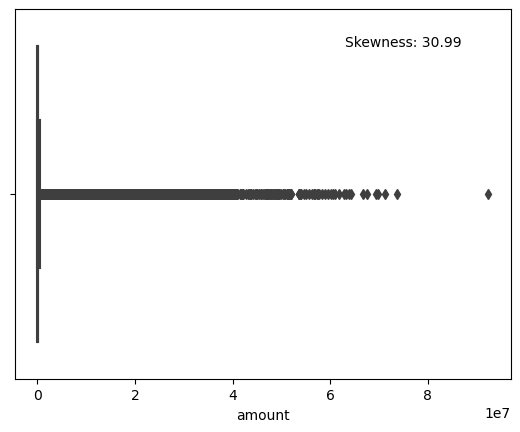

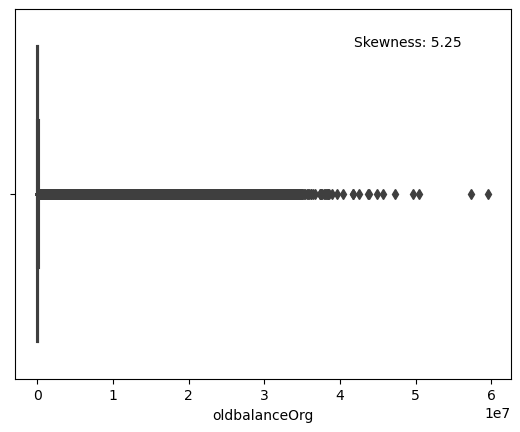

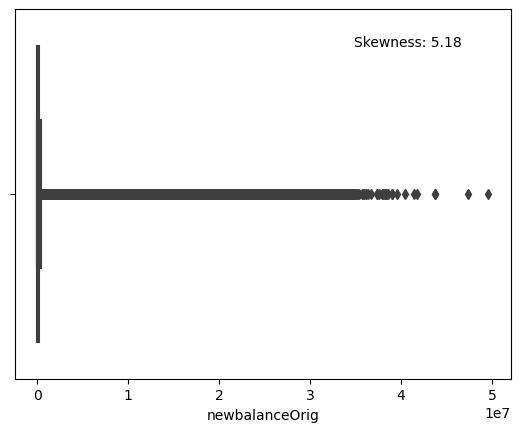

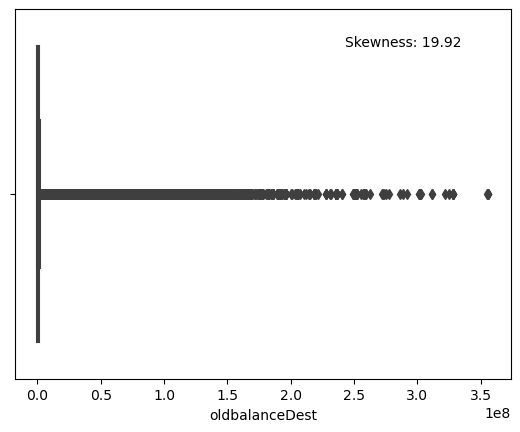

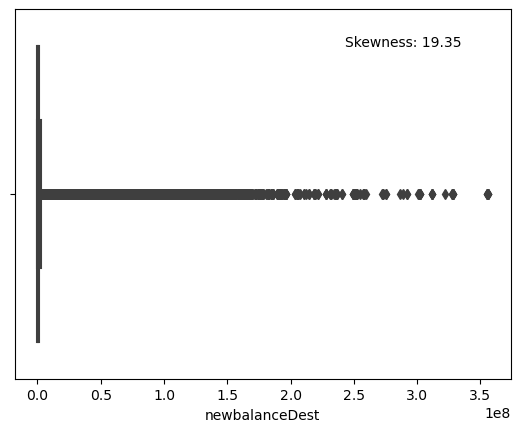

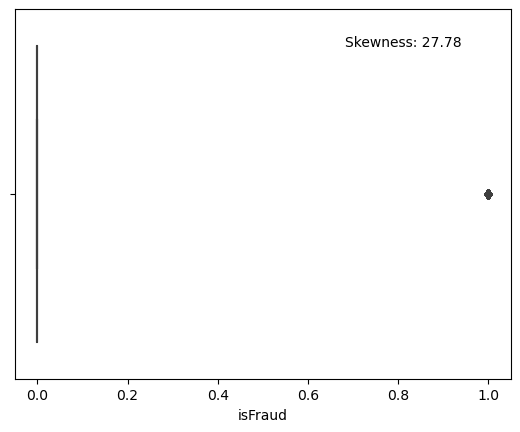

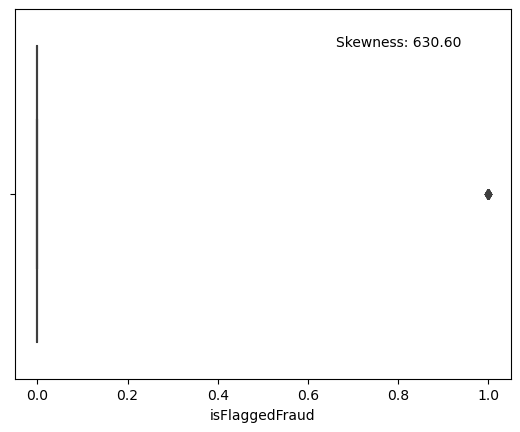

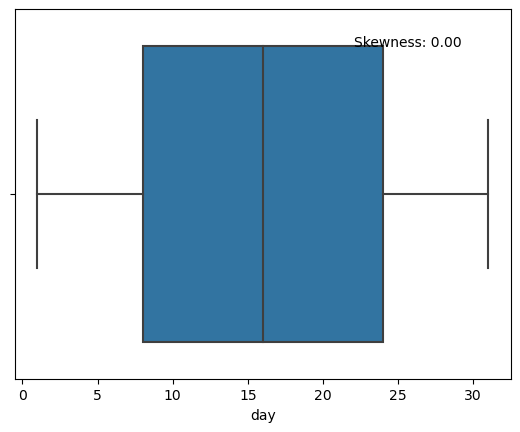

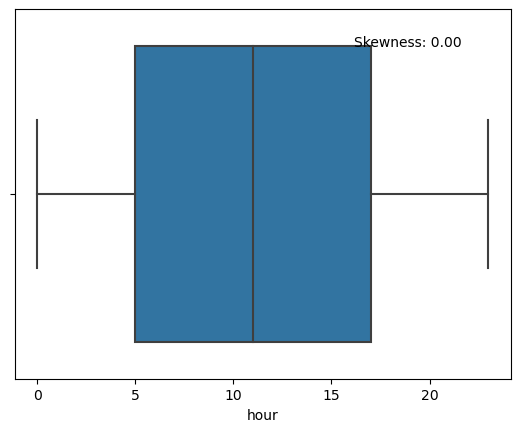

In [51]:
# Iterate over each numeric column
for column in numeric_columns:
    # Create a box plot
    sns.boxplot(x=df[column])
    
    # Calculate the skewness
    skewness = df[column].skew()
    
    # Add skewness to the plot
    plt.text(0.9, 0.9, f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes, ha='right')
    
    # Show the plot
    plt.show()


In [ ]:
## oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest column are having high skewness..
## We can consider box-cox or log transformstion for this columns.

In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,year,month,day,hour
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620.0,6362620.0,6.362620e+06,6.362620e+06
mean,3.724964e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,2023.0,5.0,1.599985e+01,1.149999e+01
std,2.147724e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,0.0,0.0,8.944202e+00,6.922190e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023.0,5.0,1.000000e+00,0.000000e+00
25%,1.860000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023.0,5.0,8.000000e+00,5.000000e+00
50%,3.720000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,2023.0,5.0,1.600000e+01,1.100000e+01
75%,5.580000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,2023.0,5.0,2.400000e+01,1.700000e+01
max,7.440000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,2023.0,5.0,3.100000e+01,2.300000e+01


In [8]:
df[df["oldbalanceOrg"]> 30000000]##seems outliers are valid in this column

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,timestamp,day,hour
64513,530,CASH_IN,255763.43,C2038478996,30102073.89,30357837.32,C446905487,667773.45,1321779.07,0,0,2023-05-23 01:00:00,23,1
64514,531,CASH_IN,42592.71,C528272795,30357837.32,30400430.02,C691620198,162932.62,236332.56,0,0,2023-05-23 02:00:00,23,2
64515,532,CASH_IN,46590.63,C1436126486,30400430.02,30447020.66,C103357744,928859.62,882268.99,0,0,2023-05-23 03:00:00,23,3
64516,533,CASH_IN,418125.29,C1104456326,30447020.66,30865145.95,C1690006071,782264.64,51947.32,0,0,2023-05-23 04:00:00,23,4
64517,534,CASH_IN,352636.03,C1030549040,30865145.95,31217781.98,C912252532,1592267.90,2415873.02,0,0,2023-05-23 05:00:00,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362452,509,TRANSFER,10000000.00,C726730575,57316255.05,47316255.05,C1364745638,0.00,0.00,1,0,2023-05-22 04:00:00,22,4
6362454,511,TRANSFER,10000000.00,C507645439,47316255.05,37316255.05,C270374999,0.00,0.00,1,0,2023-05-22 06:00:00,22,6
6362456,513,TRANSFER,10000000.00,C1277761503,37316255.05,27316255.05,C500987951,0.00,0.00,1,0,2023-05-22 08:00:00,22,8
6362576,633,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0,2023-05-27 08:00:00,27,8


In [99]:
df[df["oldbalanceDest"]> 30000000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,timestamp,year,month,day,hour
44636,741,TRANSFER,1163719.93,C1232253214,0.00,0.00,C896393489,3.014320e+07,3.130692e+07,0,0,2023-05-31 20:00:00,2023,5,31,20
51095,504,CASH_IN,59227.69,C2111571723,7713369.14,7772596.82,C803116137,3.017978e+07,3.197699e+07,0,0,2023-05-21 23:00:00,2023,5,21,23
54102,535,TRANSFER,826258.27,C391574791,0.00,0.00,C803116137,3.012055e+07,3.197699e+07,0,0,2023-05-23 06:00:00,2023,5,23,6
64408,425,CASH_IN,245053.27,C541417363,12738459.19,12983512.46,C896393489,3.130692e+07,3.168357e+07,0,0,2023-05-18 16:00:00,2023,5,18,16
65990,519,TRANSFER,791883.00,C680667813,0.00,0.00,C803116137,3.094681e+07,3.197699e+07,0,0,2023-05-22 14:00:00,2023,5,22,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360147,436,CASH_IN,134037.59,C2126436811,5543.00,139580.59,C532980658,1.053767e+08,1.052426e+08,0,0,2023-05-19 03:00:00,2023,5,19,3
6360151,440,CASH_IN,185859.66,C1567684628,97404.00,283263.66,C2096211516,3.003826e+07,2.985240e+07,0,0,2023-05-19 07:00:00,2023,5,19,7
6360536,81,TRANSFER,116054.11,C240674590,12310.00,0.00,C1070333435,5.097267e+07,5.108872e+07,0,0,2023-05-04 08:00:00,2023,5,4,8
6360931,476,CASH_OUT,138831.77,C1859319988,9140.00,0.00,C1511739951,3.313953e+07,3.327836e+07,0,0,2023-05-20 19:00:00,2023,5,20,19


In [ ]:
### we are going to keep all outliers as it seems important for our model to learn from them

### Feature Distribution

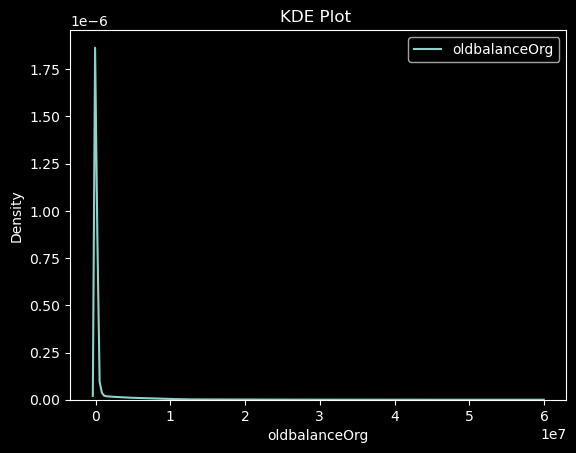

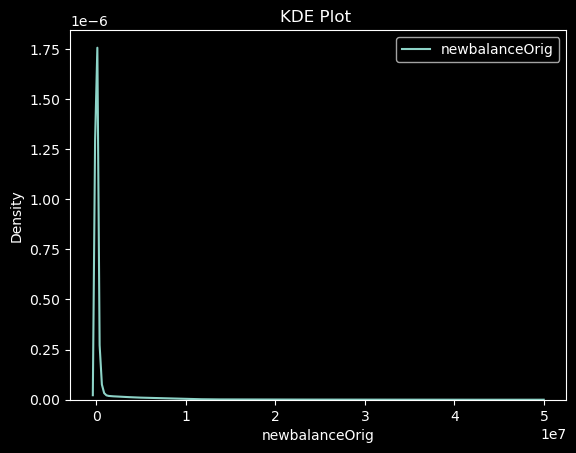

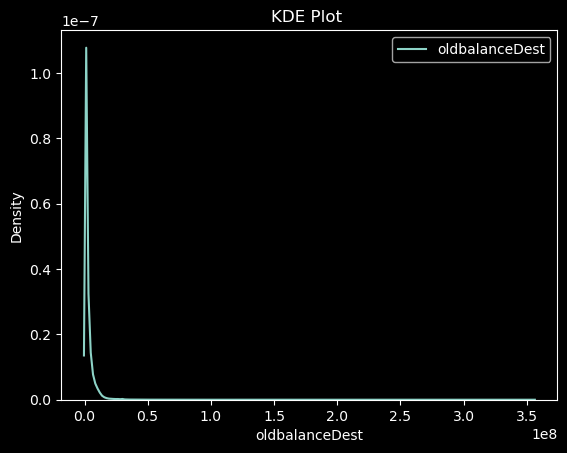

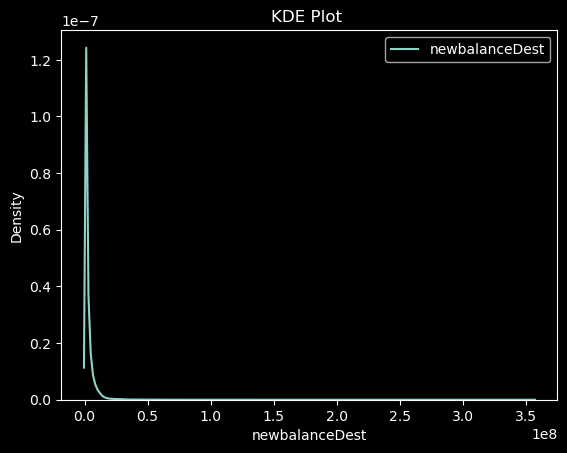

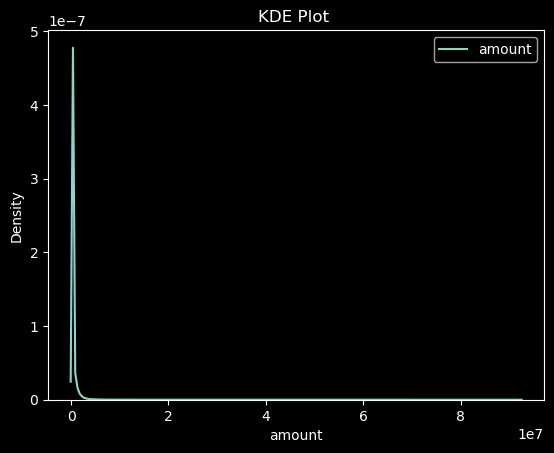

In [93]:
df_numeric=df[["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","amount"]]

for i in df_numeric.columns:
    sns.kdeplot(data=df_numeric[i],label=i)
        #plt.xlabel('Rating')
        #plt.ylabel('Density')
    plt.title('KDE Plot ')
    plt.legend()
    plt.show()
        

This pattern suggests that the majority of your data points are clustered around zero, and as the values increase, the frequency of occurrence decreases. 
It can indicate a highly skewed distribution or the presence of a large number of outliers on the higher end of the distribution.

### finding correlation between columns 

In [6]:
df=df.drop(["month","year"],axis=1)

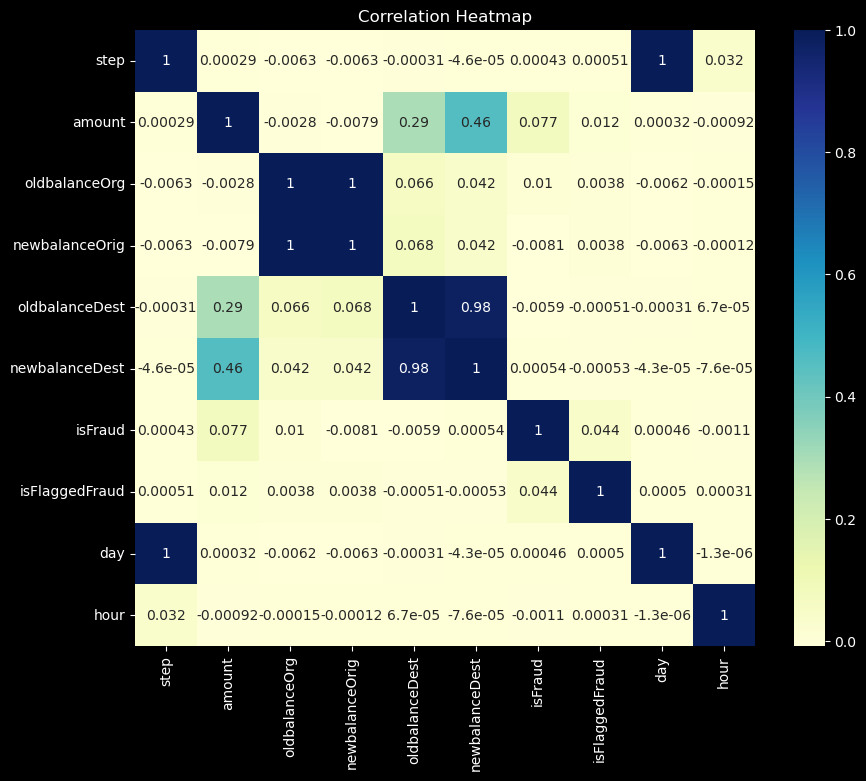

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Set the title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


 We can see oldbalanceOrg and newbalanceOrg are extremely correlated.
Also oldbalanceDest and newbalanceDest columns are highly correlated.
we can consider removing any one column of these two sets. 
we will create 2 new columns which is the difference between old and new balance in org and dest column

### checking balanced/imbalanced datasets 

In [46]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

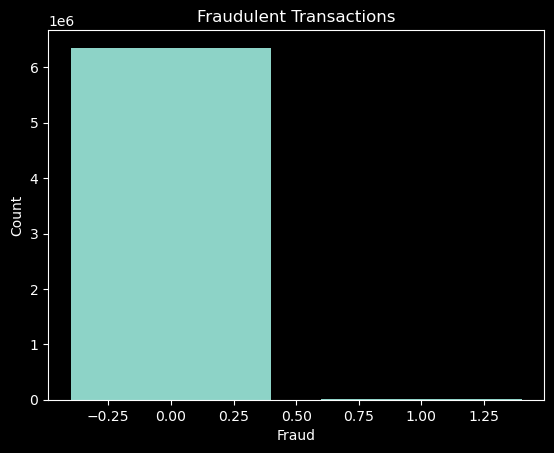

In [16]:
fraud_counts = df['isFraud'].value_counts()

# Plot the bar chart
plt.bar(fraud_counts.index, fraud_counts.values)

# Add labels and title
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Fraudulent Transactions')

# Show the plot
plt.show()

In [17]:
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


we can see it's a highly imbalanced dataset

### finding anomalies 

In [26]:
df[df["oldbalanceOrg"]==0]##checking random

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,timestamp,day,hour
29,30,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,0.00,0.00,0,0,2023-05-02 05:00:00,2,5
30,31,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,0.00,0.00,0,0,2023-05-02 06:00:00,2,6
31,32,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,0.00,0.00,0,0,2023-05-02 07:00:00,2,7
32,33,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,0.00,0.00,0,0,2023-05-02 08:00:00,2,8
33,34,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,0.00,0.00,0,0,2023-05-02 09:00:00,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356052,61,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0,2023-05-03 12:00:00,3,12
6356244,253,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,0.00,0.00,0,0,2023-05-11 12:00:00,11,12
6362461,518,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0,2023-05-22 13:00:00,22,13
6362463,520,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1,0,2023-05-22 15:00:00,22,15


we can see there are some anomalies in this datasets since the value of oldbalanceOrg column is zero in the initial stage.We will find those anomalies using IsolationForest algorithm from sklearn library.

### creating one more column for anomaly datas

In [7]:
columns_for_anomaly_detection = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount', 'isFraud', 'isFlaggedFraud']

# Create a new dataframe with the selected columns
anomaly_df_1 = df[columns_for_anomaly_detection].copy()

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter as per your requirement
model.fit(anomaly_df_1)

# Predict anomalies using the trained model
predictions = model.predict(anomaly_df_1)

# Create a new column 'is_anomaly' in the dataframe to store the anomaly predictions
df['is_anomaly'] = predictions

# Filter the dataframe to extract rows with anomalies
anomalies_1 = df[df['is_anomaly'] == -1]

# Print the rows with anomalies
anomalies_1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,timestamp,day,hour,is_anomaly
432,433,CASH_IN,349505.89,C173791568,7330235.59,7679741.48,C1590550415,17000998.23,19169204.93,0,0,2023-05-19 00:00:00,19,0,-1
463,464,CASH_IN,222711.47,C2123533871,2419068.96,2641780.43,C1590550415,16651492.34,19169204.93,0,0,2023-05-20 07:00:00,20,7,-1
616,617,CASH_IN,178370.36,C767436045,3340793.04,3519163.40,C1590550415,16656258.88,19169204.93,0,0,2023-05-26 16:00:00,26,16,-1
636,637,CASH_IN,90340.16,C660595570,6067222.09,6157562.25,C1590550415,16477888.52,19169204.93,0,0,2023-05-27 12:00:00,27,12,-1
656,657,CASH_IN,770537.37,C2015999862,8499043.13,8499043.13,C1883840933,8499043.13,16874643.09,0,0,2023-05-28 08:00:00,28,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362581,638,CASH_OUT,10000000.00,C677394894,10000000.00,0.00,C1866259073,0.00,10000000.00,1,0,2023-05-27 13:00:00,27,13,-1
6362582,639,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0,2023-05-27 14:00:00,27,14,-1
6362583,640,CASH_OUT,10000000.00,C1668034607,10000000.00,0.00,C1250722530,192912.98,10192912.98,1,0,2023-05-27 15:00:00,27,15,-1
6362599,656,CASH_OUT,4009058.39,C1970706589,4009058.39,0.00,C637394241,1229761.96,5238820.34,1,0,2023-05-28 07:00:00,28,7,-1


In [8]:
df["bal_diff_dest"]=df["newbalanceDest"]-df["oldbalanceDest"]
df["bal_diff_org"]=df["oldbalanceOrg"]-df["newbalanceOrig"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 17 columns):
 #   Column          Dtype         
---  ------          -----         
 0   step            int64         
 1   type            object        
 2   amount          float64       
 3   nameOrig        object        
 4   oldbalanceOrg   float64       
 5   newbalanceOrig  float64       
 6   nameDest        object        
 7   oldbalanceDest  float64       
 8   newbalanceDest  float64       
 9   isFraud         int64         
 10  isFlaggedFraud  int64         
 11  timestamp       datetime64[ns]
 12  day             int64         
 13  hour            int64         
 14  is_anomaly      int64         
 15  bal_diff_dest   float64       
 16  bal_diff_org    float64       
dtypes: datetime64[ns](1), float64(7), int64(6), object(3)
memory usage: 825.2+ MB


In [10]:
df=df.drop(["step","timestamp","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1)

In [106]:
df.head()

,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,day,hour,is_anomaly,bal_diff_dest,bal_diff_org
0,PAYMENT,9839.64,C1231006815,M1979787155,0,0,1,0,1,0.0,9839.64
1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,1,1,1,0.0,1864.28
2,TRANSFER,181.00,C1305486145,C553264065,1,0,1,2,1,0.0,181.00
3,CASH_OUT,181.00,C840083671,C38997010,1,0,1,3,1,-21182.0,181.00
4,PAYMENT,11668.14,C2048537720,M1230701703,0,0,1,4,1,0.0,11668.14


### encoding type column 

In [112]:
df.type.nunique()

5

In [11]:
df=pd.get_dummies(data=df,columns=['type'],drop_first=True)

In [12]:
df.sample(3)

,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,day,hour,is_anomaly,bal_diff_dest,bal_diff_org,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5653560,350846.38,C807918110,C272241287,0,0,28,0,1,350846.38,0.00,1,0,0,0
5798192,3060.33,C1549968898,M2121196080,0,0,9,8,1,0.00,3060.33,0,0,1,0
3444465,56013.96,C1293867798,C2140345195,0,0,21,9,1,56013.96,0.00,1,0,0,0


In [13]:
df=df.drop(["nameOrig","nameDest"],axis=1)

In [14]:
df.sample(3)

,amount,isFraud,isFlaggedFraud,day,hour,is_anomaly,bal_diff_dest,bal_diff_org,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3667515,11398.64,0,0,15,3,1,0.00,11392.00,0,0,1,0
5519462,317679.45,0,0,20,14,1,-65155.14,-317679.45,0,0,0,0
3126139,105051.72,0,0,25,19,1,105051.71,0.00,1,0,0,0


### train-test-split

In [15]:
x=df.drop(["isFlaggedFraud","isFraud"],axis=1)
y=df["isFraud"]

In [112]:
x.head(2)

,amount,day,hour,is_anomaly,bal_diff_dest,bal_diff_org,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,1,0,1,0.0,9839.64,0,0,1,0
1,1864.28,1,1,1,0.0,1864.28,0,0,1,0


In [58]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

### feature scaling 

In [17]:
scaler = RobustScaler()##robustscaler() is robust for outliers
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### feature importance

In [115]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

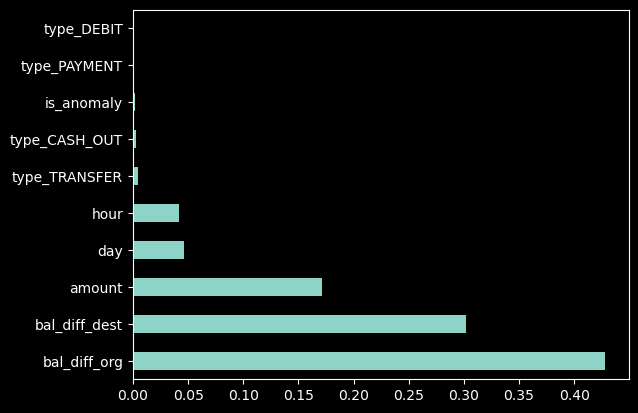

In [116]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

we can see bal_diff_org column is the crucial feature that tells whether it is fraudelent or not

In [18]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
pred=model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
score=roc_auc_score(y_test,pred)

In [21]:
score

0.7126333987043352

In [22]:
print('precision:', precision_score(y_test,pred))
print('recall:',recall_score(y_test,pred))
print('f1_score:',f1_score(y_test,pred))

precision: 0.8760195758564437
recall: 0.42534653465346534
f1_score: 0.5726472940549188


#### got low recall value. In this dataset recall is emphasized since we don't want any fraudelent transaction to be wrongly predicted as not fraudelent.

### treating imbalanced datasets with SMOTE and RandomUnderSampler

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Assuming your features are stored in X and the target variable is stored in y

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=0.5)  # Adjust the sampling_strategy as per your requirement
rus = RandomUnderSampler(sampling_strategy=0.75)  # Adjust the sampling_strategy as per your requirement

# Create the pipeline combining SMOTE and RandomUnderSampler
pipeline = make_pipeline(smote, rus)

# Apply the pipeline to the data
X_resampled, y_resampled = pipeline.fit_resample(x_train, y_train)

In [24]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 6354407, 1: 8213})


In [25]:
counter = Counter(y_resampled)
print(counter)

Counter({0: 2965430, 1: 2224073})


#### training logistic regression again after resampling 

In [40]:
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
ypred=model.predict(x_test)

### Evaluation Metrics

In [41]:
roc_auc_score(y_test,ypred)

0.9451794861644064

In [42]:
print('precision:', precision_score(y_test,ypred))
print('recall:',recall_score(y_test,ypred))
print('f1_score:',f1_score(y_test,ypred))

precision: 0.027883921494398372
recall: 0.9334653465346535
f1_score: 0.05415029751648403


#### got good recall value.

In [48]:
report_df = pd.DataFrame.from_dict(classification_report(y_test, ypred, output_dict=True))

# Print the classification report
print("Classification Report:")
print(report_df)

Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision  9.999079e-01     0.027884  0.956863  5.138959e-01  9.986221e-01
recall     9.568936e-01     0.933465  0.956863  9.451795e-01  9.568626e-01
f1-score   9.779280e-01     0.054150  0.956863  5.160391e-01  9.767060e-01
support    1.906261e+06  2525.000000  0.956863  1.908786e+06  1.908786e+06


## fine tuning and cross validation

In [37]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=10, cv=5)

# Fit the RandomizedSearchCV on your X_train and y_train datasets
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
Best Score: 0.9945923531236719


In [38]:
prediction=random_search.predict(x_test)

In [39]:
score3=roc_auc_score(y_test,prediction)
score3

0.8750011126700928

In [46]:
print('recall:',recall_score(y_test,prediction))

recall: 0.7544554455445545


In [44]:
confusion_matrix(y_test,prediction)

array([[1897772,    8489],
       [    620,    1905]])

In [45]:
report_df = pd.DataFrame.from_dict(classification_report(y_test, prediction, output_dict=True))

# Print the classification report
print("Classification Report:")
print(report_df)

Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision  9.996734e-01     0.183279  0.995228  5.914761e-01  9.985935e-01
recall     9.955468e-01     0.754455  0.995228  8.750011e-01  9.952279e-01
f1-score   9.976058e-01     0.294914  0.995228  6.462601e-01  9.966763e-01
support    1.906261e+06  2525.000000  0.995228  1.908786e+06  1.908786e+06
